# ローリング分析

## データ取得

In [1]:
import pandas_datareader.data as pdr
import datetime
start = datetime.datetime(2009,9,1)
end = datetime.datetime(2019,8,30)
JPUS = pdr.DataReader('DEXJPUS', 'fred', start, end).dropna()
JPUS.columns=['p'] #項目名をpに変更
JPUSr = JPUS['p'].pct_change().dropna() #収益率

## 250日移動平均

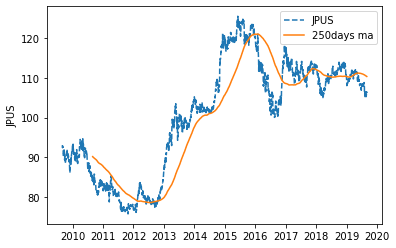

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
ma=pd.Series.rolling(JPUS, window=250).mean()

fig = plt.figure()
ax = plt.axes()
plt.plot(JPUS,label='JPUS', linestyle='dashed')
plt.plot(ma,label='250days ma')
plt.ylabel('JPUS')
plt.legend()

## 250日移動標準偏差

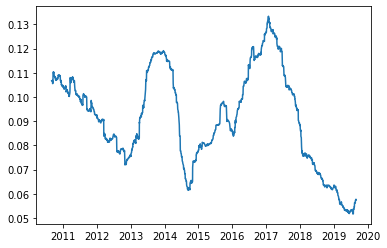

In [19]:
import numpy as np
JPUSr = JPUS['p'].pct_change().dropna() #収益率
msd = pd.Series.rolling(JPUSr, window=250).std()*np.sqrt(250)
plt.plot(msd)

**参考：対数収益率**

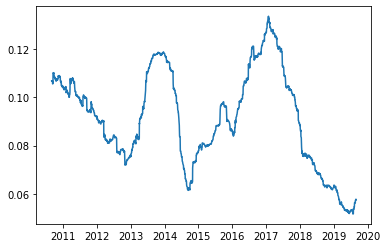

In [22]:
JPUSlndp = np.log(JPUS).diff().dropna() #対数収益率
msd2 = pd.Series.rolling(JPUSlndp, window=250).std()*np.sqrt(250)
plt.plot(msd2)